# <u><center>**Business Understanding**</center><u/>

## Project Title : **Predictive Analytics for Sepsis : A Machine Learning Approach with API Deployment**

### Problem Statement: 
Sepsis is a serious condition in which the body responds improperly to an infection. The infection-fighting processes turn on the body, causing the organs to work poorly.
Sepsis may progress to septic shock. This is a dramatic drop in blood pressure that can damage the lungs, kidneys, liver and other organs. When the damage is severe, it can lead to death.
Early treatment of sepsis improves chances for survival. 

### Project Objective:
The primary objective of this project is to develop a machine learning model that can predict the likelihood of a patient in the Intensive Care Unit (ICU) developing sepsis. By accurately predicting sepsis onset, healthcare providers can take timely and appropriate actions to prevent the condition, thereby improving patient outcomes, reducing mortality rates, and decreasing the length of ICU stays.

### Project Success Creterion:
For the project to be considered successful, it is necessary that the pipelines and models used make accurate predictions. The API should work correctly, taking multiple inputs and returning all related predictions. This is essential for predicting patients who are likely to suffer from sepsis, allowing for necessary precautions to be taken.

### Technologies and Tools:
Choose appropriate machine learning frameworks (e.g., TensorFlow, scikit-learn) and data processing tools (e.g., pandas, SQL) for model development. Decide on visualization libraries (e.g., Matplotlib, Seaborn) for result interpretation.

### Risks and Contingencies:
Identify potential risks such as data quality issues, model overfitting, or regulatory compliance. Develop contingency plans to address these risks and mitigate their impact on project timelines and outcomes.




### **Hypothesis :** 
##### ***Null Hypothesis(H0):***
Sepsis disease is most common in elderly patients i.e 40 years and above 
##### ***Alternative Hypothesis(H1):***
Sepsis disease is least common in elderly patients i.e 40 years and above

### **Analytical Questions**
1. Between insured and non-insured patients, who were the most affected by sepsis?
2. What is the distribution of body mass index (M11) across different age groups?
3. How does the average blood pressure (PR) compare between patients with positive and negative sepsis statuses?
4. Is there a significant correlation between plasma glucose levels (PRG) and the development of sepsis (Sepsis)?

# <u><center>**Data Understanding**</u></center>

In [180]:

                  ## importing necessary libraries
### libraries for data manipulation
import pandas as pd
import numpy as np

## packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

## packages for hypothesis testing
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

## Machine Learning
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler,FunctionTransformer,LabelEncoder
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

print("All modules imported")

All modules imported


In [91]:
## loading the dataset
df = pd.read_csv('./Datasets/Paitients_Files_Train.csv')

In [92]:
## getting a preview of the dataset
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


## Feature Understanding

| Column        | Name         | Description                                                       |
|---------------|--------------|-------------------------------------------------------------------|
| ID            | N/A          | Unique number to represent patient ID                             |
| PRG           | Attribute1   | Plasma glucose                                                    |
| PL            | Attribute2   | Blood Work Result-1 (mu U/ml)                                     |
| PR            | Attribute3   | Blood Pressure (mm Hg)                                            |
| SK            | Attribute4   | Blood Work Result-2 (mm)                                          |
| TS            | Attribute5   | Blood Work Result-3 (mu U/ml)                                     |
| M11           | Attribute6   | Body mass index (weight in kg/(height in m)^2)                    |
| BD2           | Attribute7   | Blood Work Result-4 (mu U/ml)                                     |
| Age           | Attribute8   | Patients age (years)                                              |
| Insurance     | N/A          | If a patient holds a valid insurance card                         |
| Sepssis        | Target       | Positive: if a patient in ICU will develop a sepsis, and Negative |


### **Exploratory Data Analysis**(**E.D.A**)

In [93]:
### getting information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [94]:
### descriptive analysis
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,599,599,ICU200608,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRG,599.0,NaN,NaN,NaN,3.824708,3.362839,0.0,1.0,3.0,6.0,17.0
PL,599.0,NaN,NaN,NaN,120.153589,32.682364,0.0,99.0,116.0,140.0,198.0
PR,599.0,NaN,NaN,NaN,68.732888,19.335675,0.0,64.0,70.0,80.0,122.0
SK,599.0,NaN,NaN,NaN,20.562604,16.017622,0.0,0.0,23.0,32.0,99.0
TS,599.0,NaN,NaN,NaN,79.460768,116.576176,0.0,0.0,36.0,123.5,846.0
M11,599.0,NaN,NaN,NaN,31.920033,8.008227,0.0,27.1,32.0,36.55,67.1
BD2,599.0,NaN,NaN,NaN,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,NaN,NaN,NaN,33.290484,11.828446,21.0,24.0,29.0,40.0,81.0
Insurance,599.0,NaN,NaN,NaN,0.686144,0.464447,0.0,0.0,1.0,1.0,1.0


In [95]:
## Confirming missing values
df.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [96]:
## checking for duplicates
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicates')

There are 0 duplicates


### **Univariate Data Analysis**

In [97]:
## defining the numeric columns
numeric_cols = [column for column in df.columns if df[column].dtype!='O']
numeric_cols_df = df[numeric_cols]
numeric_cols_df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

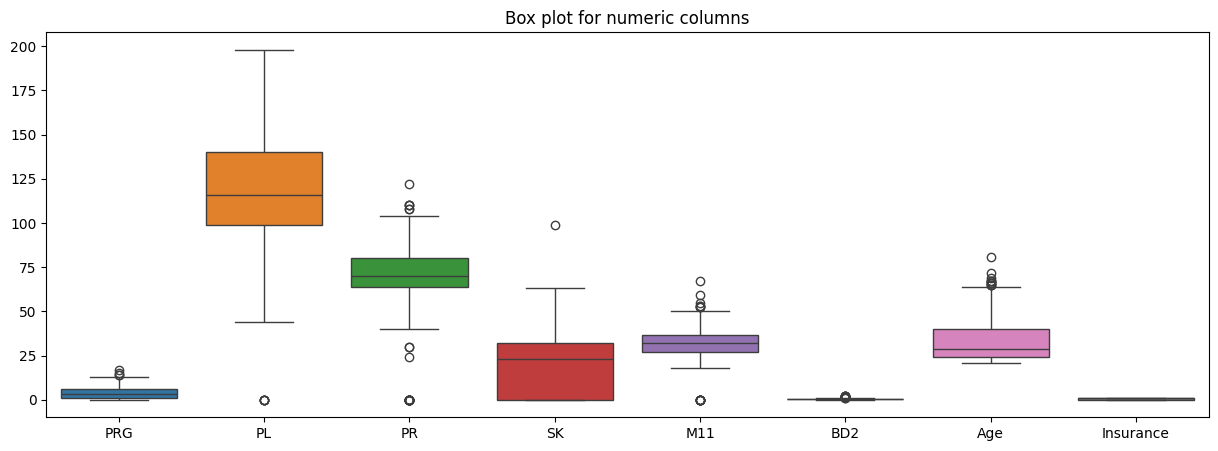

In [98]:
### plotting a box plot for numeric columns
plt.figure(figsize=(15, 5))
plt.tight_layout()
box=sns.boxplot(numeric_cols_df.drop(['TS'],axis=1)) 
plt.title('Box plot for numeric columns')
plt.show()

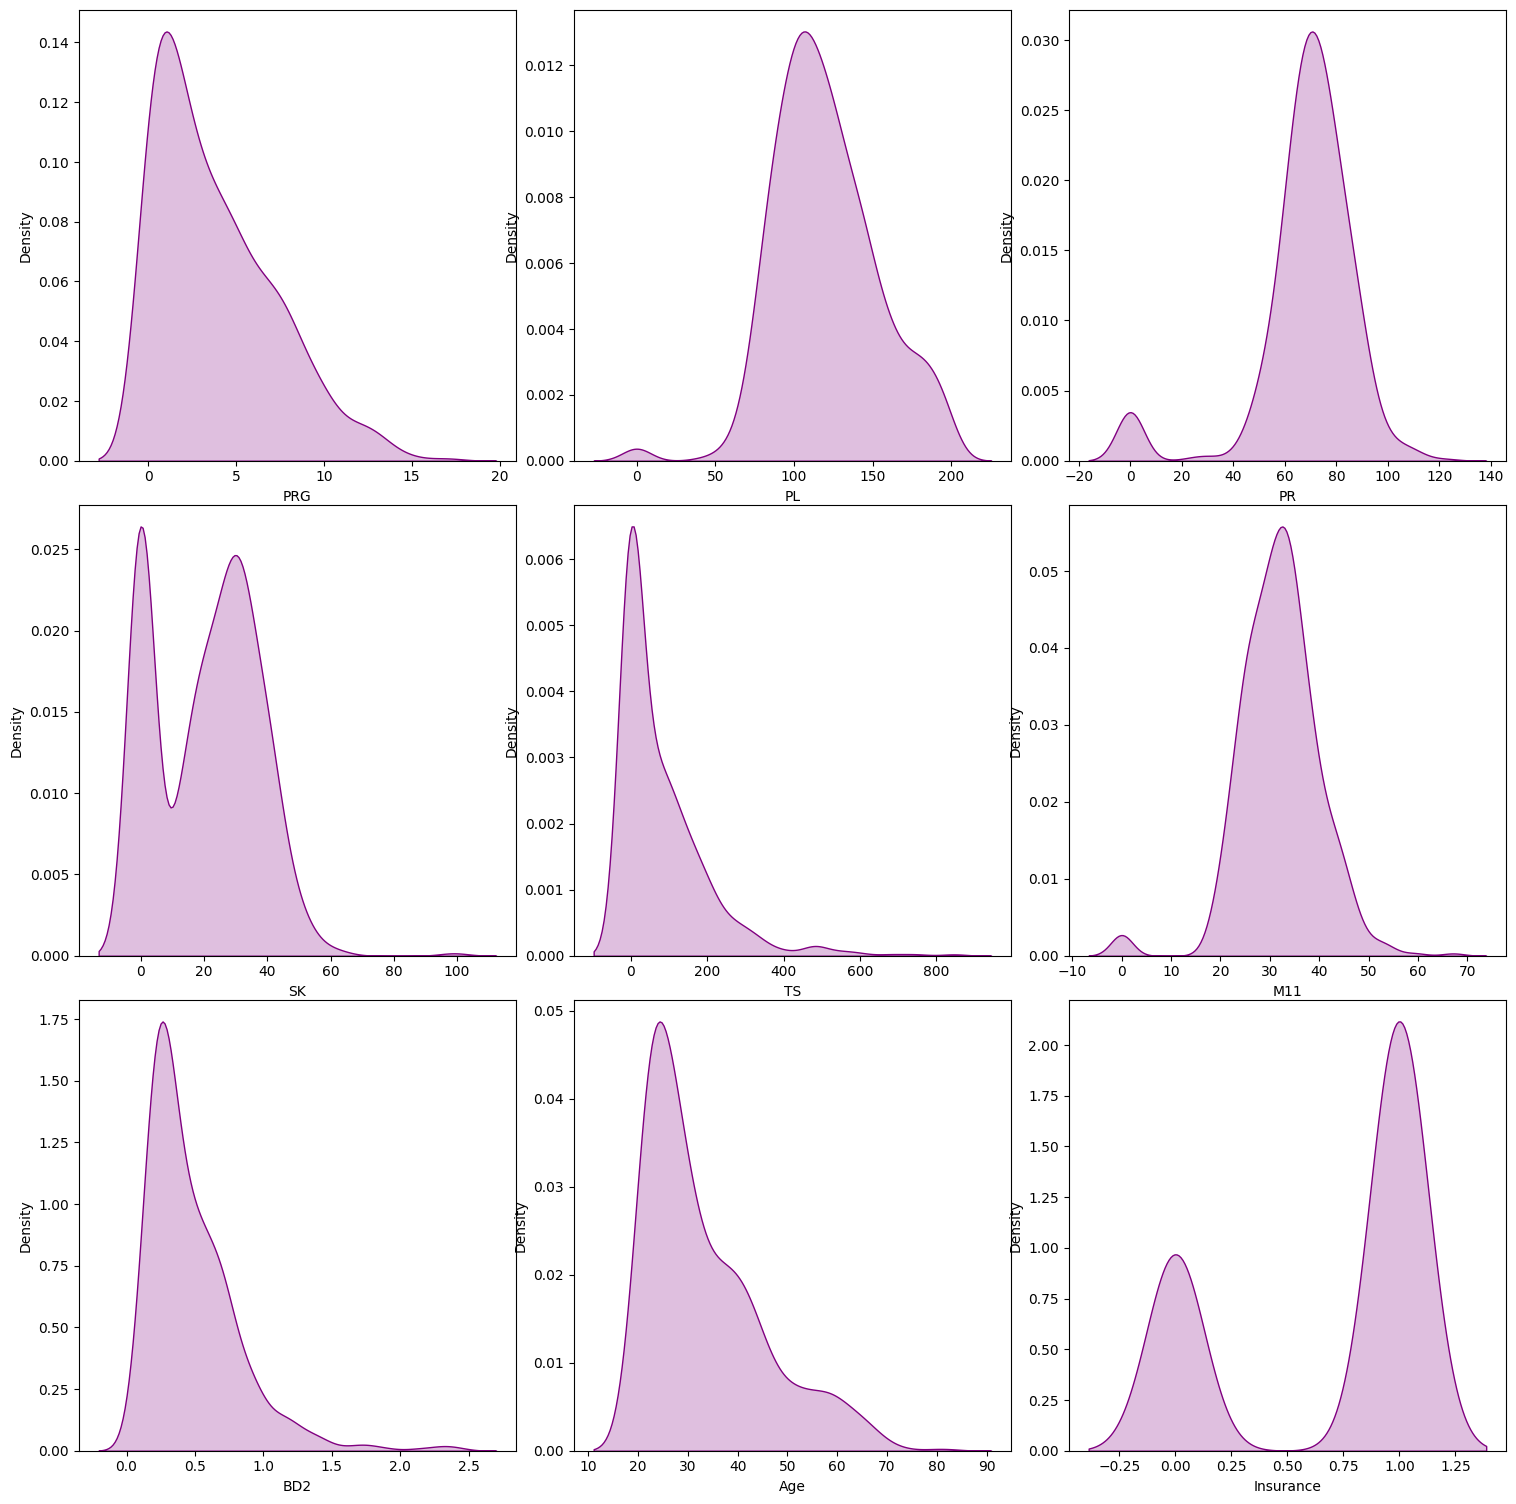

In [99]:
## distribution of numeric columns
num_rows,num_cols = 3,3
fig,axes = plt.subplots(num_rows,num_cols,figsize=(15,15))
fig.tight_layout()
for index,column in enumerate (df[numeric_cols].columns):
    i,j=(index//num_cols,index%num_cols) 
    sns.kdeplot(numeric_cols_df[column],color='purple',fill=True,ax=axes[i,j])
   
    

Text(0.5, 1.0, 'Countplot for Sepssis column')

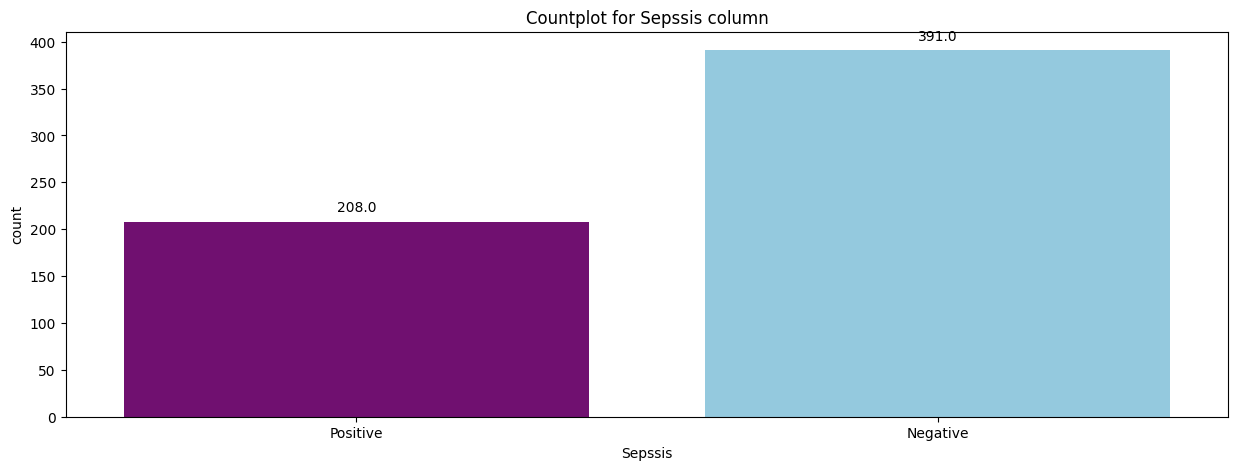

In [100]:
plt.figure(figsize=(15,5))
ax=sns.countplot(df,x='Sepssis',hue='Sepssis',palette={'Positive': 'purple', 'Negative': 'skyblue'},legend=False)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
plt.title("Countplot for Sepssis column")


### ***BI-Variate Analysis***

In [101]:
### plotting boxplot of numeric columns split by the target column
for column in df.columns:
    if (df[column].dtype!='O') & (len(df[column].unique())>2):
         ##Visual rep of if the customer churned inside the columns
        fig = px.box(df[numeric_cols],y=df[column],color=df['Sepssis'],labels={'color':'Sepssis'},title =
                     (f"a visual rep of the {column} column split by the Sepssis column"))
        fig.show()

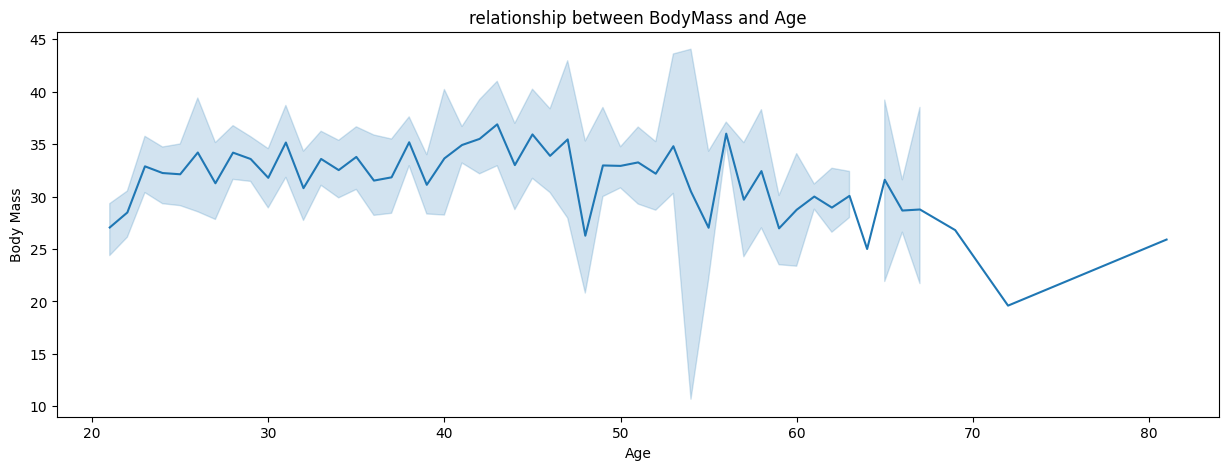

In [102]:
##plotting a lineplot between body mass and age
plt.figure(figsize=(15,5))
sns.lineplot(df,x=df['Age'],y=df['M11'])
plt.title("relationship between BodyMass and Age")
plt.ylabel("Body Mass")
plt.show()


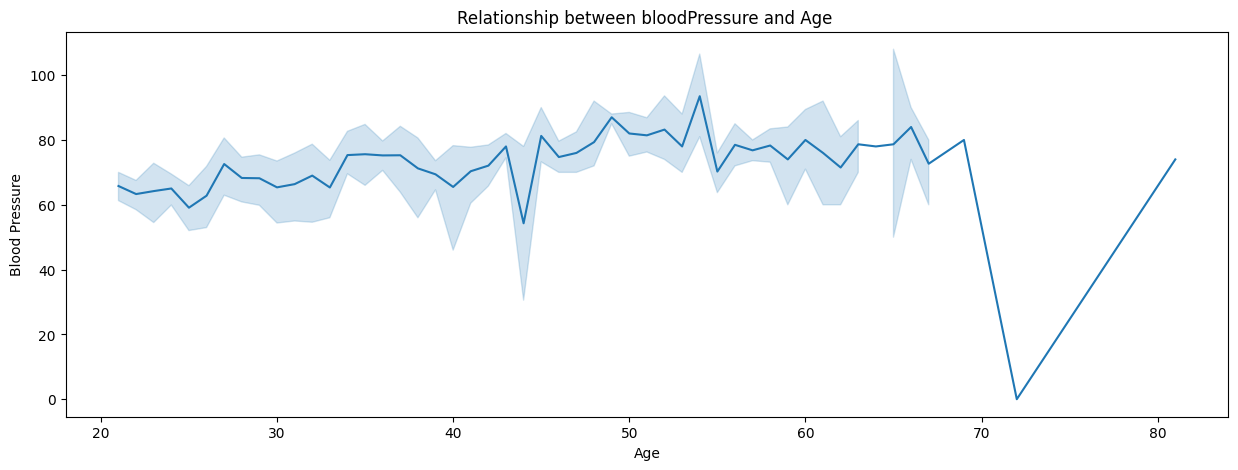

In [103]:
##plotting lineplot for the relation between age and bloodpressure
plt.figure(figsize=(15,5))
sns.lineplot(df,x=df['Age'],y=df['PR'])
plt.title("Relationship between bloodPressure and Age ")
plt.ylabel('Blood Pressure')
plt.show()

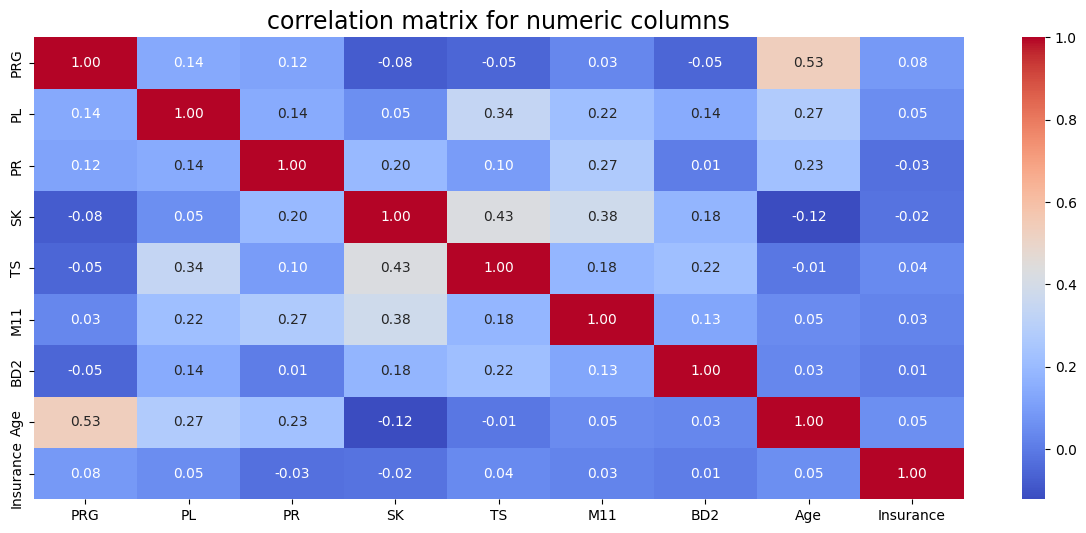

In [104]:
##correlation matrix
numeric_cols
corelation = df[numeric_cols].corr()##getting the correlations
plt.figure(figsize=(15,6))
sns.heatmap(corelation ,annot=True, fmt='.2f',cmap='coolwarm')
plt.title('correlation matrix for numeric columns',fontsize=17)
plt.show()

### ***Hypothesis Testing***
(H0) Null Hypothesis : Sepsis disease is most common in elderly patients i.e 40 years and above

(H1) Alternative Hypothesis: Sepsis disease is least common in elderly patients i.e 40 years and above

In [106]:
# Creating a column to show an elderly patient
df['elderly'] = df['Age'] >= 40

## calculating the number of samples
num_elderly = len(df[df['elderly']]) ##number of elderly patients
num_non_elderly = len(df[~df['elderly']]) ## number of younger patients

### calculating the number of positive cases 
positive_elderly = df[df['elderly']]['Sepssis'].value_counts()['Positive'] ## number of elderly patients tested positive
positive_non_elderly = df[~df['elderly']]['Sepssis'].value_counts()['Positive'] ## number of younger patients tested positive

count = [positive_elderly, positive_non_elderly] ##list of the number of positive sepsis cases for elderly and non-elderly patients.
num = [num_elderly, num_non_elderly] ##list of the total number of elderly and non-elderly patients.

## performing Z-test for proportion
stat, pval = proportions_ztest(count, num, alternative='larger')
print(f"Z-statistic: {stat}, P-value: {pval}")

if pval > 0.05:
    print('fail to reject null hypothesis')
    print('elderly patients(40 years and above) are most affected by Sepssis')
elif pval < 0.05:
    print('reject null hypothesis')
    print('elderly patients(40years and above) are least likely to be affected by Sepssis')



Z-statistic: 4.659881739836564, P-value: 1.581955545865774e-06
reject null hypothesis
elderly patients(40years and above) are least likely to be affected by Sepssis


### **Answering Analytical questions**
1. Between insured and non-insured patients, who were the most affected by sepsis?
2. What is the distribution of body mass index (M11) across different age groups?
3. How does the average blood pressure (PR) compare between patients with positive and negative sepsis statuses?
4. Is there a significant correlation between plasma glucose levels (PRG) and the development of sepsis (Sepsis)?

### question one : 
Between insured and non-insured patients, who were the most affected by sepsis?


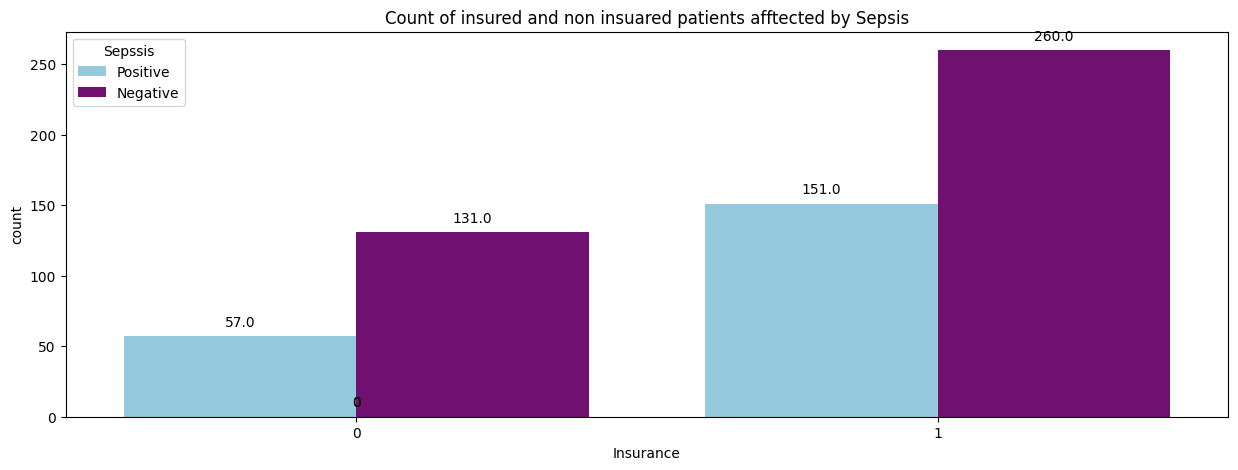

In [107]:

## plotting the countplot for insured patients
plt.figure(figsize=(15,5))
ax=sns.countplot(df,x='Insurance',hue='Sepssis',palette={'Positive':'skyblue','Negative':'purple'})
plt.title('Count of insured and non insuared patients afftected by Sepsis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


### Answer: 
Patients who were insured were the most affected by Sepssis i.e 151 while those who were not insured only 57 tested positive for the disease

### ***question 2:***
What is the distribution of body mass index (M11) across different age groups?

Text(0.5, 1.0, 'Distribution of bodymassindex across the ages')

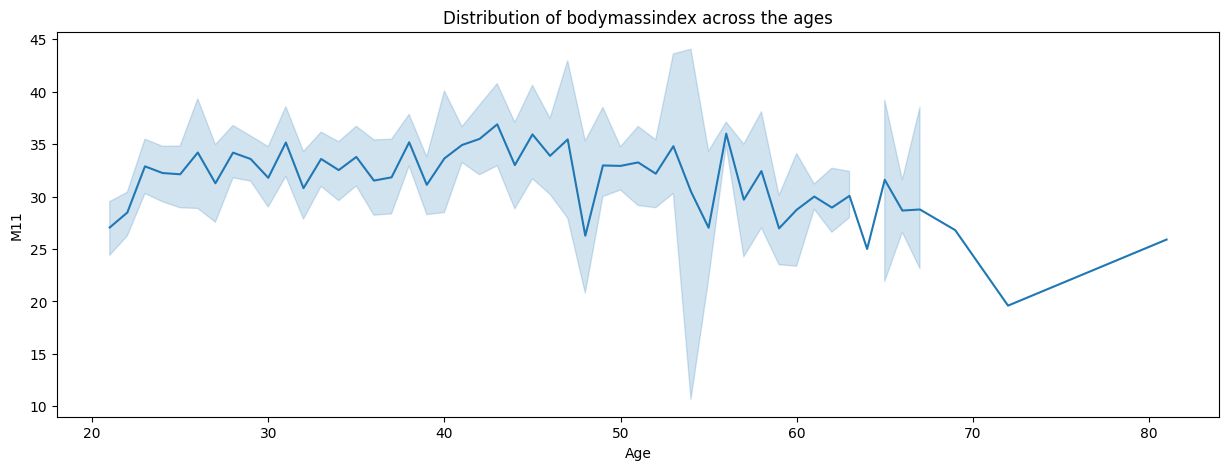

In [108]:
### plotting a lineplot to show body mass index across the ages
plt.figure(figsize=(15,5))
sns.lineplot(df,x='Age',y='M11')
plt.title('Distribution of bodymassindex across the ages')

### Answer:
- The body mass index is low for younger patients but rises for older patients.However for the elderly patients the body mass index falls.
- Thus, for younger patients and the elderly, the body mass index is quite low compared to the middle aged patients


### ***question 3:***
How does the average blood pressure (PR) compare between patients with positive and negative sepsis statuses?

In [109]:
# Calculate mean blood pressure (PR) for each sepsis status
mean_bp_by_sepsis = df.groupby('Sepssis')['PR'].mean()
mean_bp_by_sepsis

Sepssis
Negative    67.872123
Positive    70.350962
Name: PR, dtype: float64

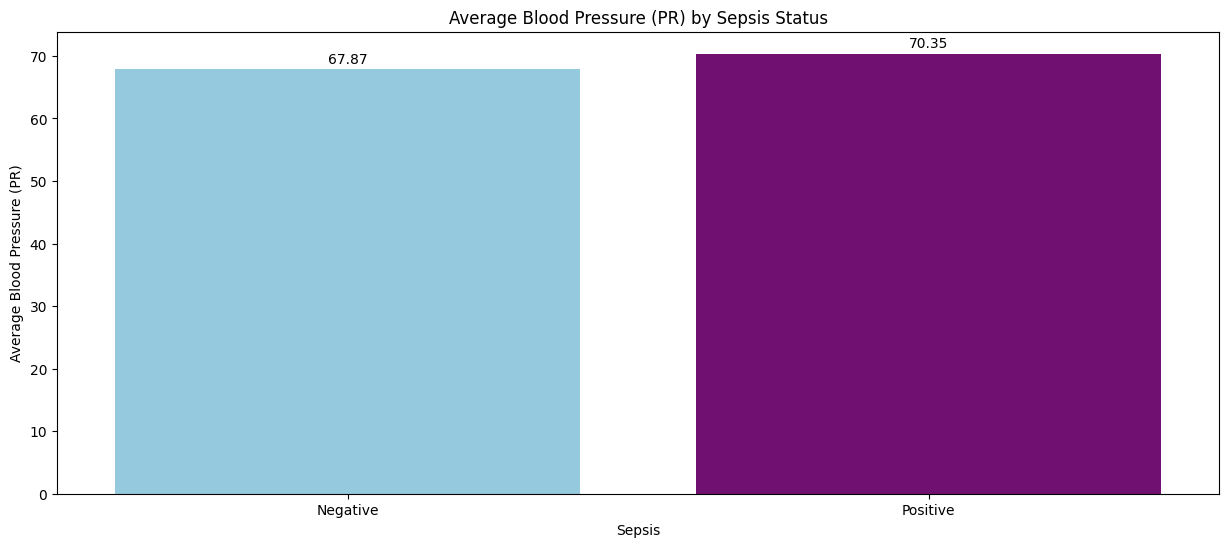

In [110]:
# Calculate mean blood pressure (PR) for each sepsis status
mean_bp_by_sepsis = df.groupby('Sepssis')['PR'].mean().reset_index()

# Plotting with Seaborn
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=mean_bp_by_sepsis, x='Sepssis', y='PR', hue='Sepssis',
                 palette={'Negative': 'skyblue', 'Positive': 'purple'})
ax.set_title('Average Blood Pressure (PR) by Sepsis Status')
ax.set_xlabel('Sepsis')
ax.set_ylabel('Average Blood Pressure (PR)')

# Add annotations
for index, row in mean_bp_by_sepsis.iterrows():
    ax.text(index, row['PR'] + 1, f'{row["PR"]:.2f}', color='black', ha='center')

plt.show()

### Answer:
- Patients that tested negative for Sepsis have a slightly lower BloodPressure average of 67.87 compared to those that tested positive for Sepsis who have an average bloodpressure of 70.35

### ***question 4:***
Is there a significant correlation between plasma glucose levels (PRG) and the development of sepsis (Sepsis)?

Point-Biserial Correlation Coefficient: 0.21
P-value: 0.0000
no significant correlation.


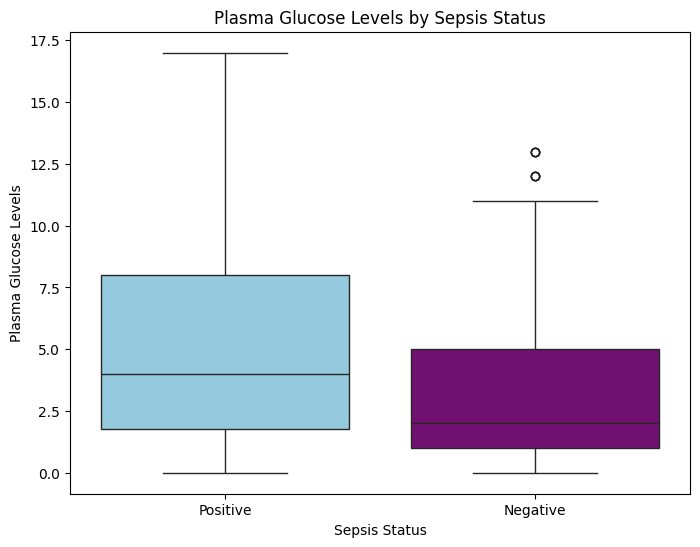

In [112]:
# Convert 'Sepsis' to numerical values for correlation calculation
df['SepsisNumeric'] = df['Sepssis'].map({'Negative': 0, 'Positive': 1})

# Calculate point-biserial correlation coefficient
##calculates the correlation coefficient between PlasmaGlucose and SepsisNumeric.
corr, p_value = stats.pointbiserialr(df['PRG'], df['SepsisNumeric']) 

# Print correlation and p-value
print(f"Point-Biserial Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")
if corr > 0.5:
    print('There is signifacant correlation between plasmaglucose and Sepsis')
elif corr < 0.5:
    print('no significant correlation.')
        
# Visualize the relationship (optional)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sepssis', y='PRG',hue='Sepssis',legend=False, data=df, palette={'Positive':'Skyblue','Negative':'purple'})
plt.title('Plasma Glucose Levels by Sepsis Status')
plt.xlabel('Sepsis Status')
plt.ylabel('Plasma Glucose Levels')
plt.show()

### ***Answer:***
- There is no significant correlation between plasmaglucose and development of Sepsis.
- This is because the the correlation between plasmaglucose and sepsis is 0.2 which suggests no significant correlation
- The Point-Biserial Correlation is specifically designed to measure the relationship between a continuous variable and a binary categorical variable

In [113]:
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis,elderly,SepsisNumeric
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,True,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,False,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,False,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,False,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,False,1


### ***Column Information Report***
- Dataset has 11 columns and 599 rows
- There are 2 non-numeric columns and 9 numeric columns
- No null values in the columns
### ***Descriptive Analysis Report***
- The highest plasma glucose recorded was 17.0
- The average blood pressure was 68.7 ranging from 0 to 122.0 
- Body mass index (M11) ranged from 0 to 67.1 with a mean of 31.9
- The oldest patient was of the age 81 while the youngest was 21 years old with the average age being 33 years
- Most patients tested negative of the target variable(sepssis)
### ***Key Insights***
- There are no major issues with the dataset
- However, there are columns that are not needed in training our models i.e ID column 
- ID column will be dropped during the data preparation step

# <center><u>**Data Preparation**</u></center>

In [115]:
# Remove the 'PatientID' column
df.drop(columns=['ID'], inplace=True)
df.columns

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance',
       'Sepssis', 'elderly', 'SepsisNumeric'],
      dtype='object')

In [116]:
# Check if the dataset is balanced
sepsis_count = df['Sepssis'].value_counts().rename('sepssis_count').reset_index()
sepsis_count

,Sepssis,sepssis_count
0,Negative,391
1,Positive,208


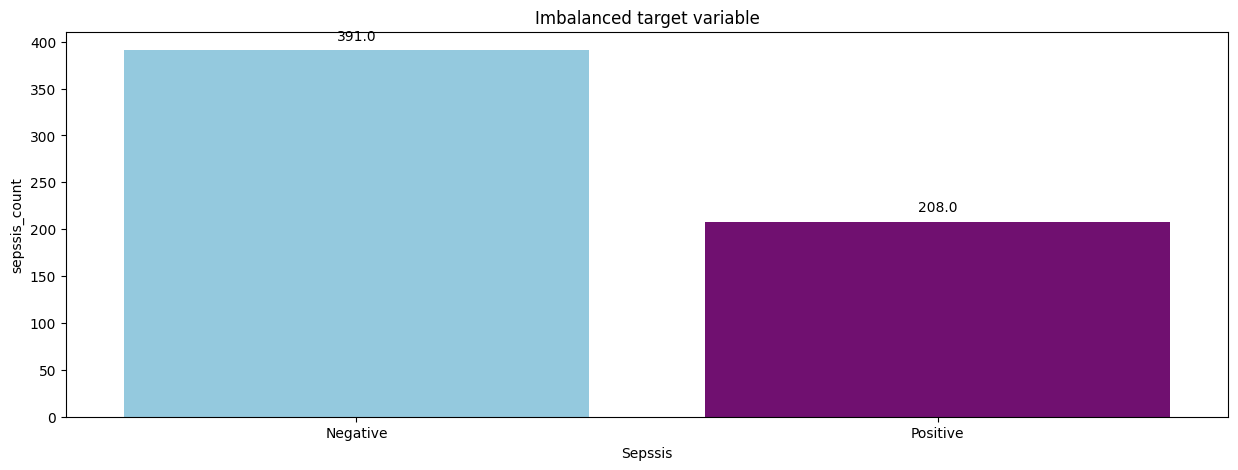

In [125]:
# visualizing the imbalance
plt.figure(figsize=(15,5))
ax=sns.barplot(sepsis_count,x='Sepssis',y='sepssis_count',hue='Sepssis',palette={'Negative':"skyblue",'Positive':'purple'})
plt.title('Imbalanced target variable')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')


- The dataset is not balanced
- The number of Negative cases are more than the number of positive cases by 183
- However, we will train the models on both balanced dataset and unbalanced dataset 

In [137]:
# Data splitting and encoding the target variable
X = df.drop(['Sepssis','elderly','SepsisNumeric'],axis=1)
y = df['Sepssis']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [183]:
# getting the features of the independent variables
input_features = X.columns
input_features

Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')

In [141]:
# Creating a Preprocessor
Preprocessor = ColumnTransformer(
    transformers=[
        ('imputer',SimpleImputer(strategy='median'),input_feature),
        ('scaler',RobustScaler(),input_features),
        
    ]
)

# <center><u>**Modelling & Evaluation**</u></center>

In [142]:
# list of models to use
models = [
    ('SVC',SVC(random_state=42,probability=True)),
    ('Stochastic_gradient_descent',SGDClassifier(random_state=42)),
    ('Random_Forest',RandomForestClassifier(random_state=42)),
    ('gradient_boost',GradientBoostingClassifier(random_state=42))
]

### ***Training on unbalanced dataset***

In [159]:
# table to store metrics
results_table = pd.DataFrame(columns=['Model_name','Precision','Recall','Accuracy','F1_score'])

#empty dictionary to store pipeline
all_pipelines ={}

#loop through the models to train and get the metrics score
for model_name,classifier in models:
    pipeline=Pipeline(steps=[
        ('preprocessor',Preprocessor),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier),
    ])
    #fit training data into pipeline
    pipeline.fit(X_train,y_train_encoded)
    #makeprediction using test or eval prediction
    y_pred = pipeline.predict(X_test)
    #store metrics report as a dictionary
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
    #save each pipeline
    all_pipelines[model_name] = pipeline
    #grab values from balanced metrics
    accuracy = metrics['accuracy']
    precission = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    
    results_table.loc[len(results_table)]=[model_name,precission,recall,accuracy,f1]
#sort table to have highest f1 on top
results_table.sort_values('F1_score',ascending=False)




,Model_name,Precision,Recall,Accuracy,F1_score
3,gradient_boost,0.759639,0.758333,0.758333,0.758932
0,SVC,0.744627,0.750000,0.750000,0.745313
1,Stochastic_gradient_descent,0.748472,0.708333,0.708333,0.714307
2,Random_Forest,0.697098,0.700000,0.700000,0.698352


In [155]:
all_pipelines['gradient_boost']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance'], dtype='object'))])),
                ('feature_importance',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001BB693FD620>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

### ***Train on Balanced Dataset***

In [161]:
# table to store metrics
balanced_results_table = pd.DataFrame(columns=['Model_name','Precision','Recall','Accuracy','F1_score'])
#empty dictionary to store pipeline
balanced_pipelines ={}

#loop through the models to train and get the metrics score
for model_name,classifier in models:
    ## create a final pipeline using pipeline module for imblearn
    pipeline=imbPipeline(steps=[
        ('preprocessor',Preprocessor),
        ('smote',SMOTE(sampling_strategy='auto')),
        ('feature_importance',SelectKBest(mutual_info_classif,k='all')),
        ('classifier',classifier),
    ])
    #fit training data into pipeline
    pipeline.fit(X_train,y_train_encoded)
    #makeprediction using test or eval prediction
    y_pred = pipeline.predict(X_test)
    #store metrics report as a dictionary
    metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
    #save each pipeline
    balanced_pipelines[model_name] = pipeline
    #grab values from balanced metrics
    accuracy = metrics['accuracy']
    precission = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']
    
    balanced_results_table.loc[len(balanced_results_table)]=[model_name,precission,recall,accuracy,f1]
#sort table to have highest f1 on top
balanced_results_table.sort_values(by='F1_score',ascending=False)


,Model_name,Precision,Recall,Accuracy,F1_score
0,SVC,0.752567,0.725000,0.725000,0.730378
2,Random_Forest,0.737500,0.725000,0.725000,0.728802
3,gradient_boost,0.737500,0.725000,0.725000,0.728802
1,Stochastic_gradient_descent,0.726162,0.733333,0.733333,0.726242


### ***Hyperparameter Tuning***

In [178]:
tuned_models_df = pd.DataFrame(columns=['Model_name','Precision','Recall','Accuracy','F1_score'])

param_grids = {
    'SVC':{
        "classifier__C": [1, 10, 100],
        "classifier__gamma": [0.01, 0.1],
    },
    'Stochastic_gradient_descent':{
        'classifier__alpha':[0.0001,0.001,],
        'classifier__loss':['hinge','log'],
    },
    'Random_Forest':{
        'classifier__n_estimators':[50,100,200],
        'classifier__max_depth':[None,10,20],
    },
    'gradient_boost':{
        'classifier__n_estimators':[50,100,200],
        'classifier__learning_rate':[0.01,0.1,0.2],
    }
}

# perform grid search for each model
for model_name,pipeline in all_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='f1_weighted')
    grid_search.fit(X_train,y_train_encoded)
    
    # update pipeline with best parameters
    best_pipeline = grid_search.best_estimator_
    all_pipelines[model_name]=best_pipeline
    # make prediction with tuned models
    y_pred = best_pipeline.predict(X_test)
    # store classification report as a dict
    tuned_metrics = classification_report(y_test_encoded,y_pred,output_dict=True)
    # grabed valued from tuned_metric dict
    accuracy = tuned_metrics['accuracy']
    precission = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']
    
    # add these values to the table
    tuned_models_df.loc[len(tuned_models_df)]=[model_name,precission,recall,accuracy,f1]
#sort table to have highest f1 on top
tuned_models_df.sort_values(by='F1_score',ascending=False)
    
    
    
    
    


c:\Users\USER\Desktop\Machine Learning API\mlvenv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\Desktop\Machine Learning API\mlvenv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\Desktop\Machine Learning API\mlvenv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\Desktop\Machine Learn

,Model_name,Precision,Recall,Accuracy,F1_score
3,gradient_boost,0.726465,0.725000,0.725000,0.725682
2,Random_Forest,0.716667,0.716667,0.716667,0.716667
0,SVC,0.657770,0.666667,0.666667,0.596575
1,Stochastic_gradient_descent,0.592014,0.625000,0.625000,0.592421


### ***Persist Model***

In [182]:
# persist the trained pipelines along label encoder
for model_name,pipeline in all_pipelines.items():
    #save the pipeline object
    joblib.dump(pipeline,f'./models/{(model_name)}_pipeline.pkl')
    
#save the label encoder separately
joblib.dump(encoder,'label_encoder.pkl')

['label_encoder.pkl']